<a href="https://colab.research.google.com/github/VarunGor/ML/blob/master/SMS_Classifier_SPAM_or_HAM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# SMS Classifier as either SPAM or HAM

---
##Varun GOR


<h2>Classify future SMS as either spam or ham using Naive Bayes Classifier</h2>

**Data Fields**

1. type
2. text


## Loading the Data

In [0]:
import pandas as pd
import numpy as np

In [0]:
url = 'https://raw.githubusercontent.com/VarunGor/Dataset/master/SMS.csv'

sms_data = pd.read_csv(url)

In [9]:
print('Data Rows : ', len(sms_data))
sms_data.head(5)

Data Rows :  5574


,type,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


## Data Processing

In [0]:
# import natural language tool kit
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer

nltk.download('stopwords')

In [0]:
# replace spam to 1 and ham to 0

sms_data.type.replace('spam', 1, inplace=True)
sms_data.type.replace('ham', 0, inplace=True)

In [12]:
sms_data.head(10)

,type,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
5,1,FreeMsg Hey there darling it's been 3 week's n...
6,0,Even my brother is not like to speak with me. ...
7,0,As per your request 'Melle Melle (Oru Minnamin...
8,1,WINNER!! As a valued network customer you have...
9,1,Had your mobile 11 months or more? U R entitle...


<h2>tf-idf</h2>

**Term Frequency** : The weight of a term that occurs in a document is simply proportional to the term frequency.

***TF = Frequency of a word in a document / Total number of words in a document***

**Inverse Document Frequency** : The specificity of a term can be quantified as an inverse function of the number of documents in which it occurs.

***IDF = log(Num_Docs/Word_in_Num_docs)***


<h3> TF-IDF = TF * IDF</h3>


In [0]:
# remove StopWords and tfidf vectorization
stopwords_set = set(stopwords.words('english'))
vectorizer = TfidfVectorizer(strip_accents='ascii', stop_words=stopwords_set)

In [35]:
# convert Text into features
features = vectorizer.fit_transform(sms_data.text)

print(features.shape)
print(features.data)

(5574, 8586)
[0.19367544 0.34661851 0.16250347 ... 0.69423987 0.53028734 0.48664807]


In [30]:
print(vectorizer.get_feature_names())

['00', '000', '000pes', '008704050406', '0089', '0121', '01223585236', '01223585334', '0125698789', '02', '0207', '02072069400', '02073162414', '02085076972', '021', '03', '04', '0430', '05', '050703', '0578', '06', '07', '07008009200', '07046744435', '07090201529', '07090298926', '07099833605', '07123456789', '0721072', '07732584351', '07734396839', '07742676969', '07753741225', '0776xxxxxxx', '07781482378', '07786200117', '077xxx', '078', '07801543489', '07808', '07808247860', '07808726822', '07815296484', '07821230901', '078498', '07880867867', '0789xxxxxxx', '07946746291', '0796xxxxxx', '07973788240', '07xxxxxxxxx', '08', '0800', '08000407165', '08000776320', '08000839402', '08000930705', '08000938767', '08001950382', '08002888812', '08002986030', '08002986906', '08002988890', '08006344447', '0808', '08081263000', '08081560665', '0825', '083', '0844', '08448350055', '08448714184', '0845', '08450542832', '08452810071', '08452810073', '08452810075over18', '0870', '08700435505150p', '

## Naive Bayes Classifier

In [0]:
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn import naive_bayes
import matplotlib.pyplot as plt

In [0]:
# create input X(Independent Variable(s)) and output y(Dependent Variable)
y = sms_data.type

X = features

In [0]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=123)

In [0]:
##Train Naive Bayes Classifier
nb_clf = naive_bayes.MultinomialNB()
model=nb_clf.fit(X_train, y_train)

In [0]:
y_pred=model.predict(X_test)

In [44]:
print('Accuracy : ',metrics.accuracy_score(y_test,y_pred))
print(metrics.classification_report(y_test, y_pred))

Accuracy :  0.9713055954088953
              precision    recall  f1-score   support

           0       0.97      1.00      0.98      1190
           1       1.00      0.80      0.89       204

    accuracy                           0.97      1394
   macro avg       0.98      0.90      0.94      1394
weighted avg       0.97      0.97      0.97      1394



In [53]:
#Find the probability of assigning a SMS to a specific class
prd=model.predict_proba(X_test)
print('    P(ham)','\t','P(spam)')
print(prd)

    P(ham) 	 P(spam)
[[0.99293961 0.00706039]
 [0.97298338 0.02701662]
 [0.9889776  0.0110224 ]
 ...
 [0.99422514 0.00577486]
 [0.98912435 0.01087565]
 [0.99231794 0.00768206]]


In [0]:
# store the predicted probabilities for class 1
y_pred_prob = model.predict_proba(X_test)[:, 1]

# roc_curve returns 3 objects 
#   1. false positive rate, 
#   2. true positive rate, 
#   3. thresholds
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_prob)

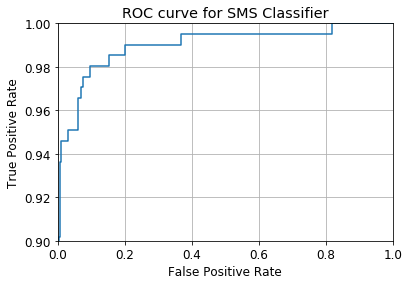

In [66]:
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.90, 1.0])
plt.rcParams['font.size'] = 12
plt.title('ROC curve for SMS Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid(True)